In [2]:
#############################################
# Label Encoding & Binary Encoding
#############################################

In [3]:
import pandas as pd
import numpy as np

def load():
    data = pd.read_csv("titanic.csv")
    return data


df = load()
df.head()

df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:

df = load()
df.head()
df["Sex"].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(df["Sex"])[0:5]
le.inverse_transform([0, 1])

array(['female', 'male'], dtype=object)

In [7]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

df = load()

In [8]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2 ]

In [9]:

for col in binary_cols:
    label_encoder(df, col)

In [ ]:
df.head()

df = load_application_train()
df.shape

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

df[binary_cols].head()


for col in binary_cols:
    label_encoder(df, col)

In [10]:
df = load()
df["Embarked"].value_counts()
df["Embarked"].nunique()
len(df["Embarked"].unique())

4

In [11]:
#############################################
# One-Hot Encoding
#############################################

df = load()
df.head()
df["Embarked"].value_counts()

pd.get_dummies(df, columns=["Embarked"]).head()

pd.get_dummies(df, columns=["Embarked"], drop_first=True).head()

pd.get_dummies(df, columns=["Embarked"], dummy_na=True).head()

pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True).head()



,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1


In [12]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe


In [13]:
df = load()
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]


In [14]:
one_hot_encoder(df, ohe_cols).head()

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Cabin,Pclass_2,Pclass_3,...,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,0,1,...,0,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,0,1,...,0,0,0,0,0,0,0,0,0,1


In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#############################################
# Rare Encoding
#############################################

# 1. Kategorik değişkenlerin azlık çokluk durumunun analiz edilmesi.
# 2. Rare kategoriler ile bağımlı değişken arasındaki ilişkinin analiz edilmesi.
# 3. Rare encoder yazacağız.


In [18]:

###################
# 1. Kategorik değişkenlerin azlık çokluk durumunun analiz edilmesi.
###################
def load_application_train():
    data = pd.read_csv("application_train.csv")
    return data

df = load_application_train()
df["NAME_EDUCATION_TYPE"].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [20]:
###################
# grab_col_names
###################



def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)


Observations: 307511
Variables: 122
cat_cols: 54
num_cols: 67
cat_but_car: 1
num_but_cat: 39


In [21]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)


Observations: 307511
Variables: 122
cat_cols: 54
num_cols: 67
cat_but_car: 1
num_but_cat: 39


In [25]:



def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()


for col in cat_cols:
    cat_summary(df, col)

                 NAME_CONTRACT_TYPE      Ratio
Cash loans                   278232  90.478715
Revolving loans               29279   9.521285
##########################################
     CODE_GENDER      Ratio
F         202448  65.834393
M         105059  34.164306
XNA            4   0.001301
##########################################
   FLAG_OWN_CAR      Ratio
N        202924  65.989184
Y        104587  34.010816
##########################################
   FLAG_OWN_REALTY      Ratio
Y           213312  69.367275
N            94199  30.632725
##########################################
                 NAME_TYPE_SUITE      Ratio
Unaccompanied             248526  80.818572
Family                     40149  13.056118
Spouse, partner            11370   3.697429
Children                    3267   1.062401
Other_B                     1770   0.575589
Other_A                      866   0.281616
Group of people              271   0.088127
##########################################
         

   FLAG_DOCUMENT_14      Ratio
0            306608  99.706352
1               903   0.293648
##########################################
   FLAG_DOCUMENT_15      Ratio
0            307139  99.879029
1               372   0.120971
##########################################
   FLAG_DOCUMENT_16     Ratio
0            304458  99.00719
1              3053   0.99281
##########################################
   FLAG_DOCUMENT_17      Ratio
0            307429  99.973334
1                82   0.026666
##########################################
   FLAG_DOCUMENT_18      Ratio
0            305011  99.187021
1              2500   0.812979
##########################################
   FLAG_DOCUMENT_19     Ratio
0            307328  99.94049
1               183   0.05951
##########################################
   FLAG_DOCUMENT_20     Ratio
0            307355  99.94927
1               156   0.05073
##########################################
   FLAG_DOCUMENT_21      Ratio
0            307408  99.96

In [26]:

###################
# 2. Rare kategoriler ile bağımlı değişken arasındaki ilişkinin analiz edilmesi.
###################

df["NAME_INCOME_TYPE"].value_counts()

df.groupby("NAME_INCOME_TYPE")["TARGET"].mean()


def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

rare_analyser(df, "TARGET", cat_cols)


NAME_CONTRACT_TYPE : 2
                  COUNT     RATIO  TARGET_MEAN
Cash loans       278232  0.904787     0.083459
Revolving loans   29279  0.095213     0.054783


CODE_GENDER : 3
      COUNT     RATIO  TARGET_MEAN
F    202448  0.658344     0.069993
M    105059  0.341643     0.101419
XNA       4  0.000013     0.000000


FLAG_OWN_CAR : 2
    COUNT     RATIO  TARGET_MEAN
N  202924  0.659892     0.085002
Y  104587  0.340108     0.072437


FLAG_OWN_REALTY : 2
    COUNT     RATIO  TARGET_MEAN
N   94199  0.306327     0.083249
Y  213312  0.693673     0.079616


NAME_TYPE_SUITE : 7
                  COUNT     RATIO  TARGET_MEAN
Children           3267  0.010624     0.073768
Family            40149  0.130561     0.074946
Group of people     271  0.000881     0.084871
Other_A             866  0.002816     0.087760
Other_B            1770  0.005756     0.098305
Spouse, partner   11370  0.036974     0.078716
Unaccompanied    248526  0.808186     0.081830


NAME_INCOME_TYPE : 8
                  

    COUNT    RATIO  TARGET_MEAN
0  307139  0.99879     0.080791
1     372  0.00121     0.029570


FLAG_DOCUMENT_16 : 2
    COUNT     RATIO  TARGET_MEAN
0  304458  0.990072     0.081046
1    3053  0.009928     0.049132


FLAG_DOCUMENT_17 : 2
    COUNT     RATIO  TARGET_MEAN
0  307429  0.999733     0.080744
1      82  0.000267     0.024390


FLAG_DOCUMENT_18 : 2
    COUNT    RATIO  TARGET_MEAN
0  305011  0.99187     0.080925
1    2500  0.00813     0.056800


FLAG_DOCUMENT_19 : 2
    COUNT     RATIO  TARGET_MEAN
0  307328  0.999405     0.080738
1     183  0.000595     0.065574


FLAG_DOCUMENT_20 : 2
    COUNT     RATIO  TARGET_MEAN
0  307355  0.999493     0.080727
1     156  0.000507     0.083333


FLAG_DOCUMENT_21 : 2
    COUNT     RATIO  TARGET_MEAN
0  307408  0.999665     0.080710
1     103  0.000335     0.135922


AMT_REQ_CREDIT_BUREAU_HOUR : 5
      COUNT     RATIO  TARGET_MEAN
0.0  264366  0.859696     0.077173
1.0    1560  0.005073     0.080128
2.0      56  0.000182     0.107143
3.

In [27]:


#############################################
# 3. Rare encoder'ın yazılması.
#############################################

def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

new_df = rare_encoder(df, 0.01)

rare_analyser(new_df, "TARGET", cat_cols)



NAME_CONTRACT_TYPE : 2
                  COUNT     RATIO  TARGET_MEAN
Cash loans       278232  0.904787     0.083459
Revolving loans   29279  0.095213     0.054783


CODE_GENDER : 3
       COUNT     RATIO  TARGET_MEAN
F     202448  0.658344     0.069993
M     105059  0.341643     0.101419
Rare       4  0.000013     0.000000


FLAG_OWN_CAR : 2
    COUNT     RATIO  TARGET_MEAN
N  202924  0.659892     0.085002
Y  104587  0.340108     0.072437


FLAG_OWN_REALTY : 2
    COUNT     RATIO  TARGET_MEAN
N   94199  0.306327     0.083249
Y  213312  0.693673     0.079616


NAME_TYPE_SUITE : 5
                  COUNT     RATIO  TARGET_MEAN
Children           3267  0.010624     0.073768
Family            40149  0.130561     0.074946
Rare               2907  0.009453     0.093911
Spouse, partner   11370  0.036974     0.078716
Unaccompanied    248526  0.808186     0.081830


NAME_INCOME_TYPE : 5
                       COUNT     RATIO  TARGET_MEAN
Commercial associate   71617  0.232892     0.074843
Pens

    COUNT     RATIO  TARGET_MEAN
0  304458  0.990072     0.081046
1    3053  0.009928     0.049132


FLAG_DOCUMENT_17 : 2
    COUNT     RATIO  TARGET_MEAN
0  307429  0.999733     0.080744
1      82  0.000267     0.024390


FLAG_DOCUMENT_18 : 2
    COUNT    RATIO  TARGET_MEAN
0  305011  0.99187     0.080925
1    2500  0.00813     0.056800


FLAG_DOCUMENT_19 : 2
    COUNT     RATIO  TARGET_MEAN
0  307328  0.999405     0.080738
1     183  0.000595     0.065574


FLAG_DOCUMENT_20 : 2
    COUNT     RATIO  TARGET_MEAN
0  307355  0.999493     0.080727
1     156  0.000507     0.083333


FLAG_DOCUMENT_21 : 2
    COUNT     RATIO  TARGET_MEAN
0  307408  0.999665     0.080710
1     103  0.000335     0.135922


AMT_REQ_CREDIT_BUREAU_HOUR : 5
      COUNT     RATIO  TARGET_MEAN
0.0  264366  0.859696     0.077173
1.0    1560  0.005073     0.080128
2.0      56  0.000182     0.107143
3.0       9  0.000029     0.000000
4.0       1  0.000003     0.000000


AMT_REQ_CREDIT_BUREAU_DAY : 9
      COUNT     RAT

In [28]:
df["OCCUPATION_TYPE"].value_counts()


Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [29]:
#############################################
# Feature Scaling (Özellik Ölçeklendirme)
#############################################

###################
# StandardScaler: Klasik standartlaştırma. Ortalamayı çıkar, standart sapmaya böl. z = (x - u) / s
###################

df = load()
ss = StandardScaler()
df["Age_standard_scaler"] = ss.fit_transform(df[["Age"]])
df.head()

NameError: name 'StandardScaler' is not defined

In [ ]:
###################
# RobustScaler: Medyanı çıkar iqr'a böl.
###################

rs = RobustScaler()
df["Age_robuts_scaler"] = rs.fit_transform(df[["Age"]])
df.describe().T

In [ ]:
###################
# MinMaxScaler: Verilen 2 değer arasında değişken dönüşümü
###################

# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min

mms = MinMaxScaler()
df["Age_min_max_scaler"] = mms.fit_transform(df[["Age"]])
df.describe().T

df.head()


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: Age, dtype: float64


NameError: name 'plt' is not defined

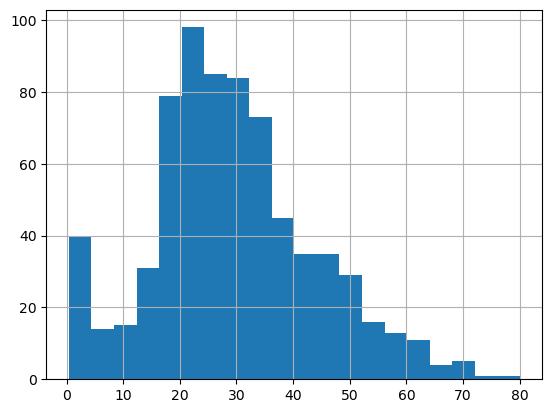

In [30]:

age_cols = [col for col in df.columns if "Age" in col]

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

for col in age_cols:
    num_summary(df, col, plot=True)


In [31]:

###################
# Numeric to Categorical: Sayısal Değişkenleri Kateorik Değişkenlere Çevirme
# Binning
###################

df["Age_qcut"] = pd.qcut(df['Age'], 5)

In [33]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_qcut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(19.0, 25.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(31.8, 41.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(25.0, 31.8]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(31.8, 41.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(31.8, 41.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(25.0, 31.8]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(0.419, 19.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(25.0, 31.8]"
